In [1]:
import sys, os
sys.path.append('/Users/raashidkhan/Desktop/GitHub-Projects/MNIST_Classification')
print(os.getcwd(), sys.path[0])
from src.training import load_split, get_or_train_model

/Users/raashidkhan/Coding/GitHub-Projects/MNIST_Classification/notebook /opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python314.zip


ModuleNotFoundError: No module named 'src'

In [ ]:
X_train,y_train,X_test,y_test=load_split()
model = get_or_train_model()

In [ ]:
y_train_predictions = model.predict(X_train)
import pandas as pd
pd.DataFrame({'Predicted': y_train_predictions, 'Actual': y_train==5})

,Predicted,Actual
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
59995,False,False
59996,True,True
59997,False,False
59998,False,False


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train==5, y_train_predictions)

array([[53338,  1242],
       [  922,  4498]])

True Negatives=53338
True Positives=4498
False Negative=922
False Positive=1242

Now let us say we reached perfection by:

In [ ]:
perfect_predictions = y_train==5
confusion_matrix(y_train==5, perfect_predictions)

array([[54580,     0],
       [    0,  5420]])

So, there have been false negatives and false positives in our predictions.

Now, to know exact accuracy/performance of our model, we need to consider these things

precision = TP/TP + FP
recall = TP/TP + FN

In [ ]:
from sklearn.metrics import precision_score, recall_score
print ('Precision Score: ',precision_score(y_train==5, y_train_predictions))
print ('Recall Score: ',recall_score(y_train==5, y_train_predictions))

Precision Score:  0.783623693379791
Recall Score:  0.8298892988929889


In [ ]:
#Precision Score:  0.783623693379791
#Recall Score:  0.8298892988929889

Now, our model doesnt look as good as it was using cross_val_score
Now, we get why should we use confusion matrix to calculate performance of binary classifier

In [ ]:
from sklearn.metrics import f1_score
print ('F1 Score: ',f1_score(y_train==5, y_train_predictions))

F1 Score:  0.8060931899641577


### SO, F1 is a mixed score of recall and precision
#### Recall and Precision are inversely proportional, one increases with the decrease in other. This is called the precision/recall trade-off.

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train==5, model.decision_function(X_train))

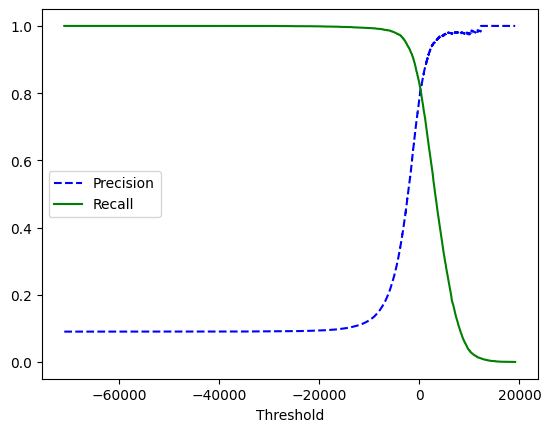

In [ ]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [ ]:
precision

array([0.09033333, 0.09033484, 0.09033634, ..., 1.        , 1.        ,
       1.        ], shape=(60001,))

In [ ]:
model.decision_function(X_train)

array([ -8899.76485642, -14547.1944155 ,  -8124.30472093, ...,
        -3994.00978923,  -4940.55831988,  -8985.57088168], shape=(60000,))

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np


f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("Best threshold:", best_threshold)
print("Best F1 score:", best_f1)


Best threshold: 245.40844309037885
Best F1 score: 0.8104116669743401
